In [152]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [159]:
np.random.seed(2)
X, labels = make_blobs()

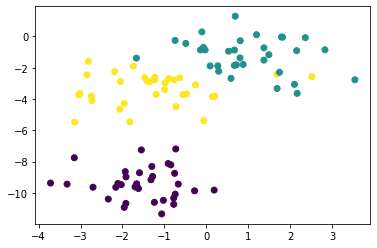

In [160]:
plt.scatter(X[:, 0], X[:, 1],c=labels)

In [161]:
from sklearn.mixture import GaussianMixture

In [40]:
x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

In [41]:
x.shape

(100, 100)

In [42]:
y.shape

(100, 100)

In [43]:
XY.shape
from scipy.stats import multivariate_normal



In [124]:
n_clusters = 3
import warnings
warnings.filterwarnings('ignore')
np.random.seed(5)
gmm = GaussianMixture(n_components=n_clusters, max_iter=1, init_params='random')
gmm.fit(X)

for i in range(100):
    plt.cla()
    plt.clf()
    for m, c in zip(gmm.means_, gmm.covariances_):
        mv = multivariate_normal(mean=m, cov=c)
        plt.contour(np.sort(X[:,0]),np.sort(X[:,1]),mv.pdf(XY).reshape(len(X),len(X)))
    plt.scatter(X[:, 0], X[:, 1])
    plt.title("Iteration: {}".format(str(i).zfill(2)))
    plt.savefig("../figs/gmm/2d/{}.png".format(str(i).zfill(2)))
    plt.cla()
    plt.clf()
    
    
    precisions = np.zeros_like(gmm.covariances_)
    for k in range(n_clusters):
        precisions[k] = np.linalg.inv(gmm.covariances_[k])
    gmm = GaussianMixture(n_components=n_clusters, max_iter=1, means_init=gmm.means_, precisions_init=precisions)
    gmm.fit(X)
        

<Figure size 432x288 with 0 Axes>

In [64]:
!mkdir -p ../figs/gmm/2d/



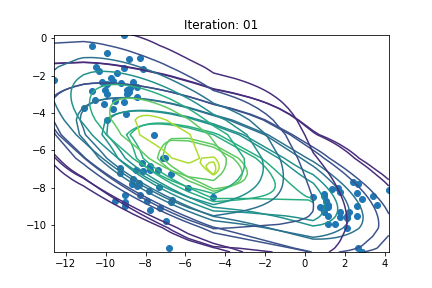
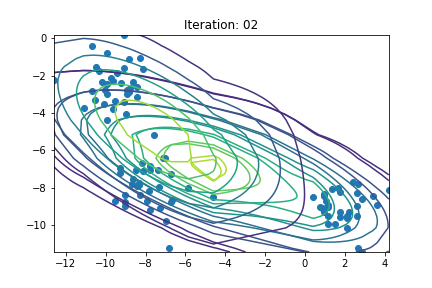
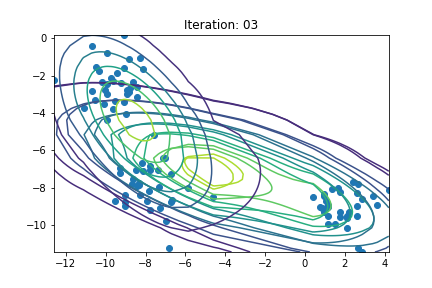
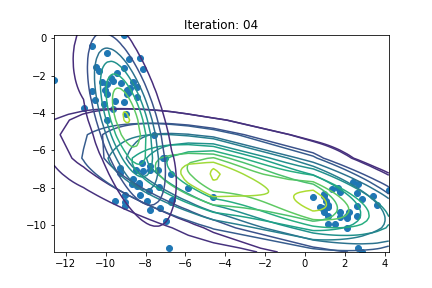
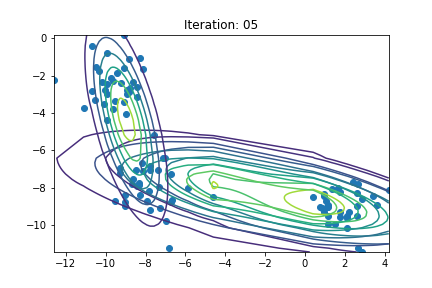
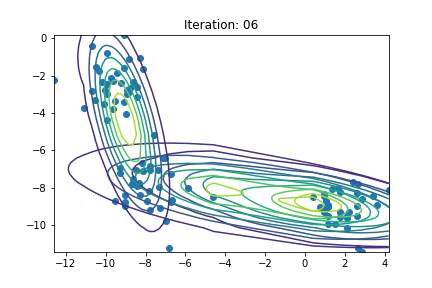
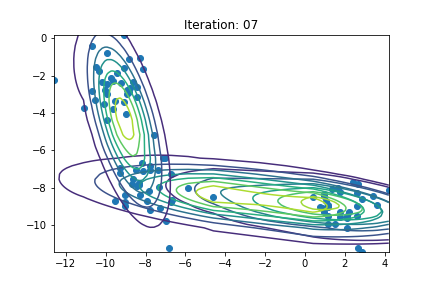
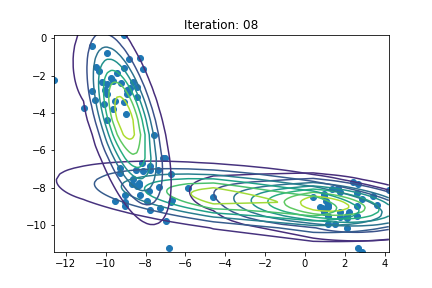
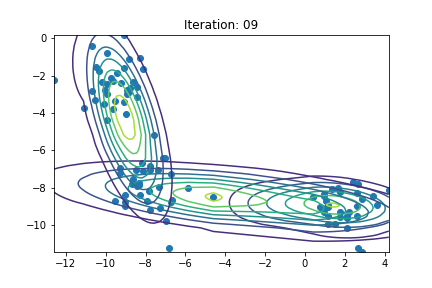
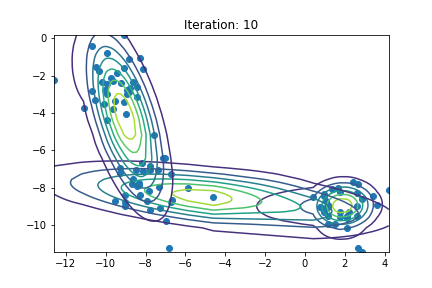
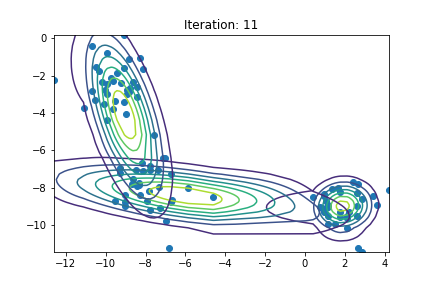
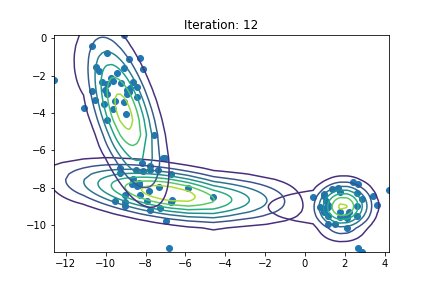
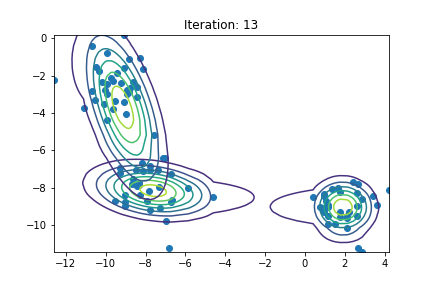
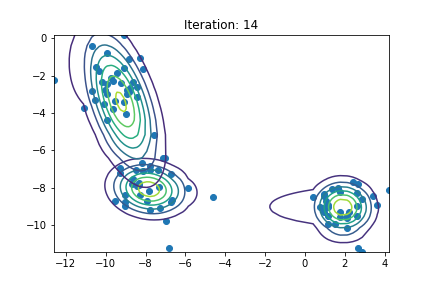
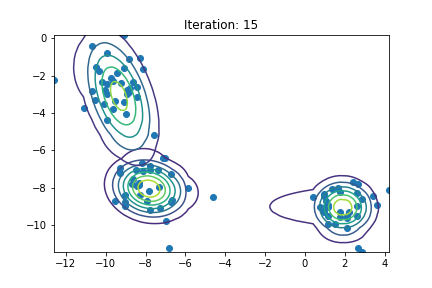
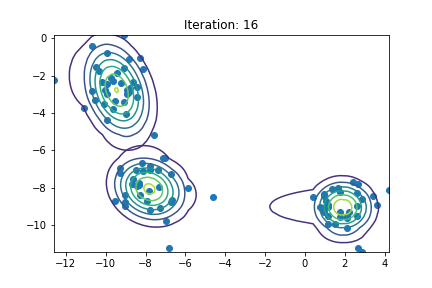
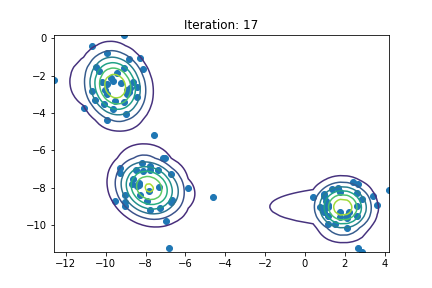
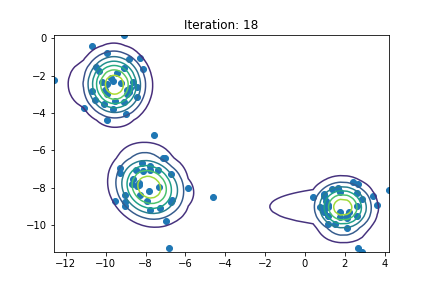
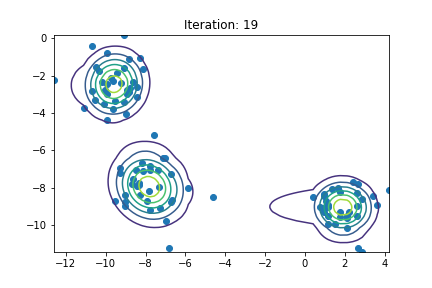
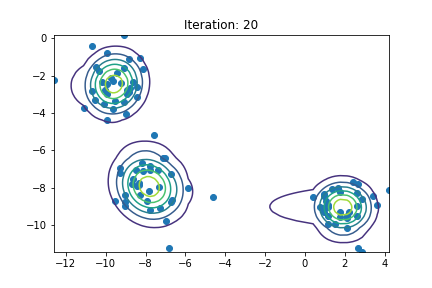
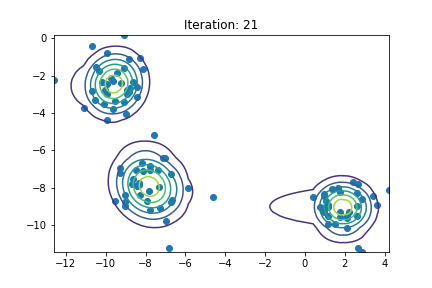
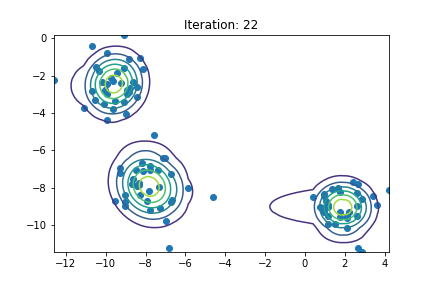
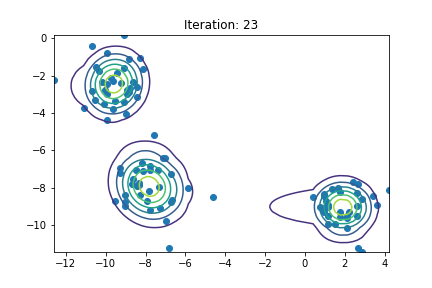
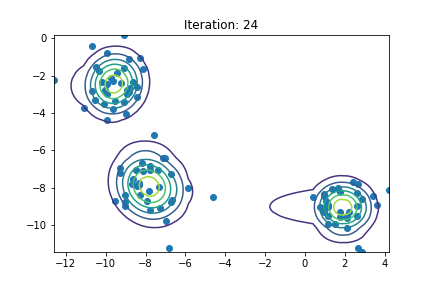
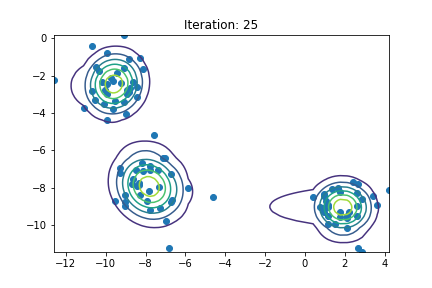
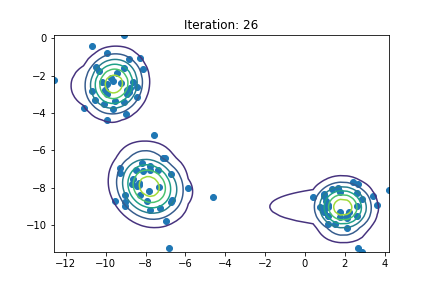
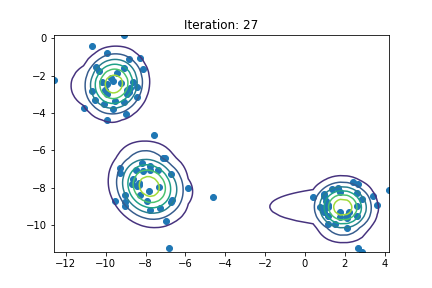
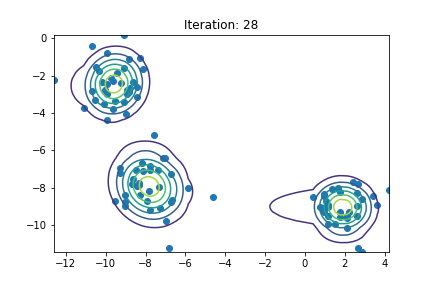
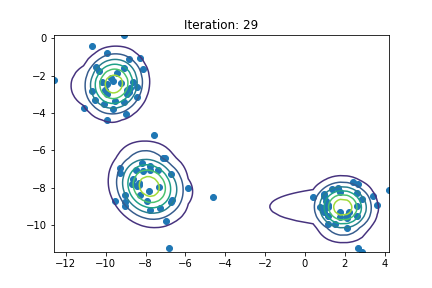
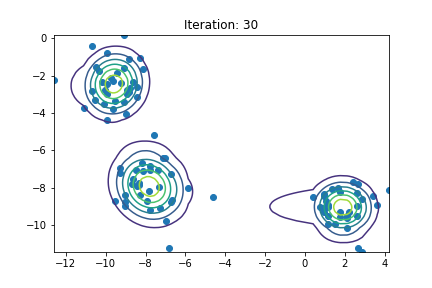
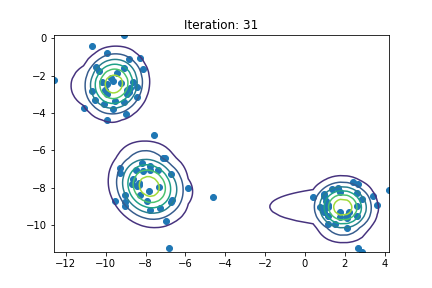
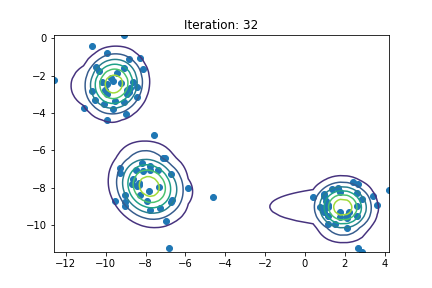
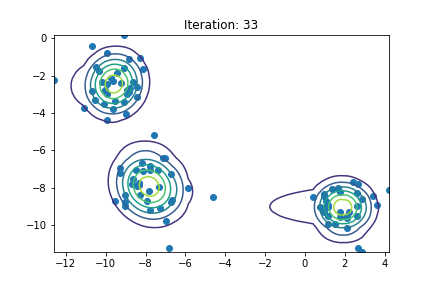
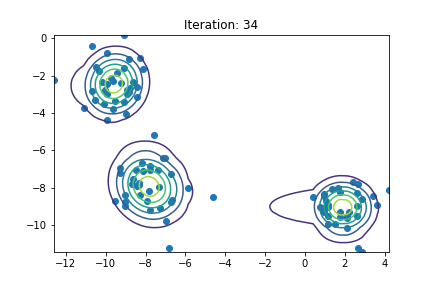
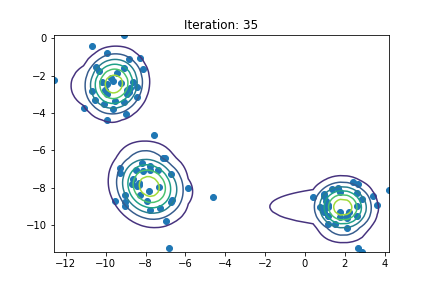
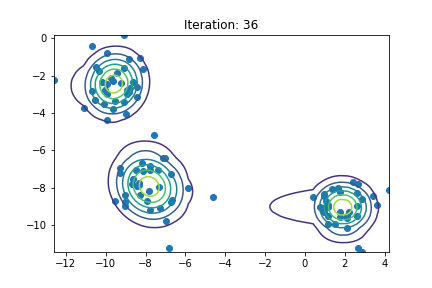
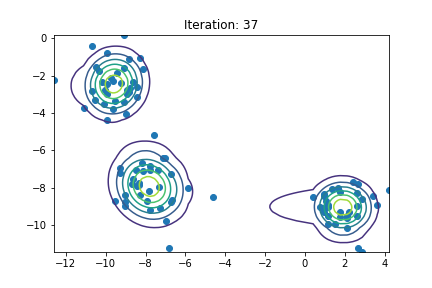
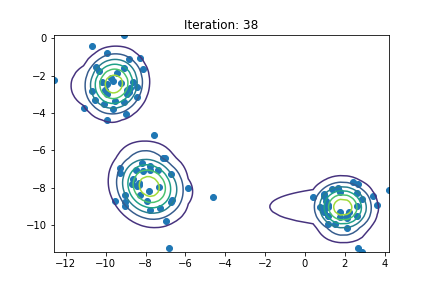
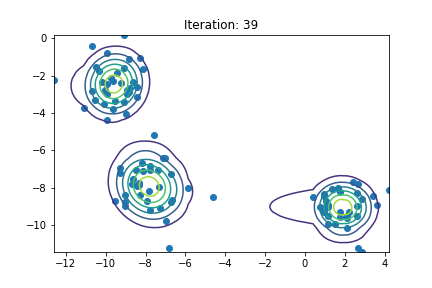

In [125]:

import mediapy
# Show titled images side-by-side:
images = {"Iteration: {}".format(i): mediapy.read_image(f'../figs/gmm/2d/{str(i).zfill(2)}.png') for i in range(1, 40)
}
mediapy.show_images(images, vmin=0.0, vmax=2.0, border=True, columns=10, height=400)

In [126]:
!convert -delay 20 -loop 0 ../figs/gmm/2d/*.png ../figs/gmm/gmm-2d.gif

![](../figs/gmm/gmm-2d.gif)

In [129]:
from sklearn.datasets import fetch_olivetti_faces

In [130]:
X, y = fetch_olivetti_faces(return_X_y=True)


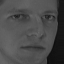
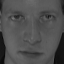
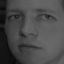
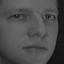
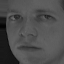
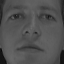
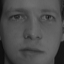
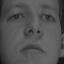
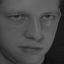
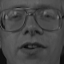
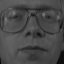
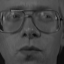
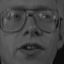
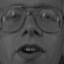
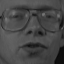
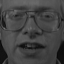
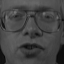
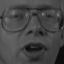
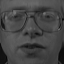
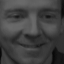
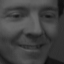
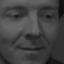
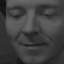
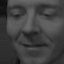
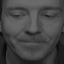
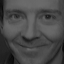
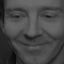
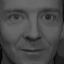
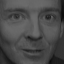
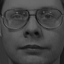
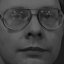
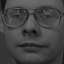
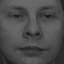
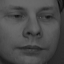
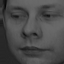
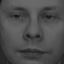
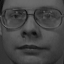
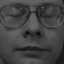
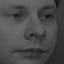

In [137]:
images = {i:X[i].reshape(64, 64) for i in range(1, 40)}
mediapy.show_images(images, vmin=0.0, vmax=2.0, border=True, columns=10, height=400)
#mediapy.show_image(X[1].reshape(64, 64))

In [138]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(X)
data.shape

(400, 260)

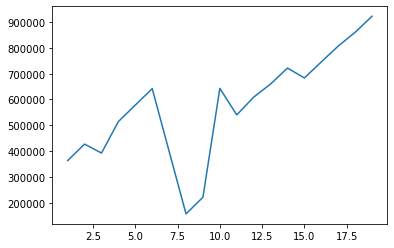

In [141]:
n_components = np.arange(1, 20, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [143]:
gmm = GaussianMixture(8, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [146]:
data_new, data_new_labels = gmm.sample(100)
data_new.shape

(100, 260)

In [147]:
faces_new = pca.inverse_transform(data_new)


In [149]:
faces_new.shape

(100, 4096)


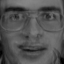
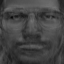
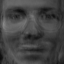
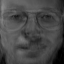
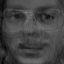
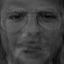
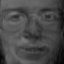
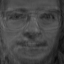
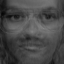
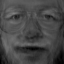
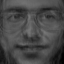
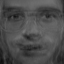
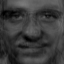
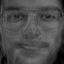
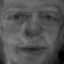
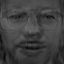
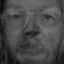
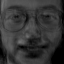
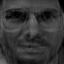
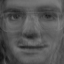
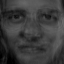
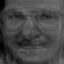
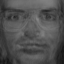
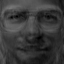
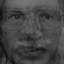
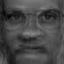
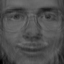
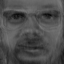
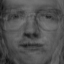
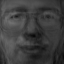
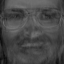
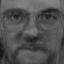
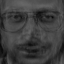
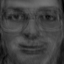
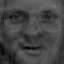
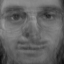
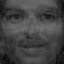
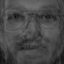
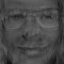
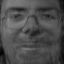
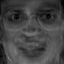
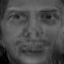
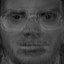
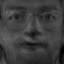
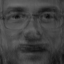
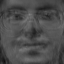
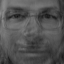
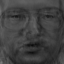
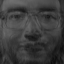
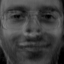
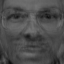
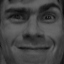
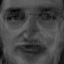
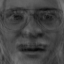
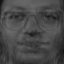
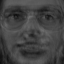
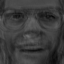
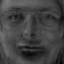
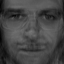
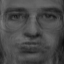
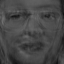
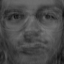
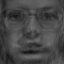
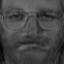
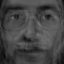
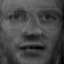
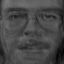
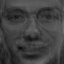
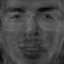
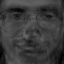
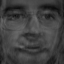
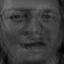
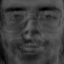
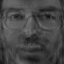
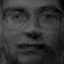
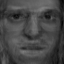
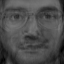
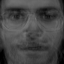
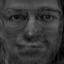
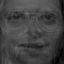
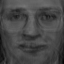
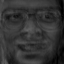
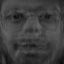
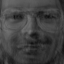
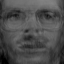
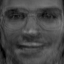
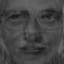
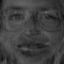
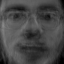
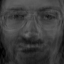
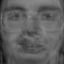
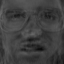
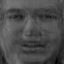
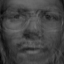
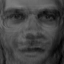
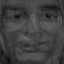
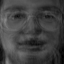
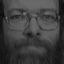
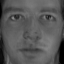

In [150]:
gen_images = {i:faces_new[i].reshape(64, 64) for i in range(1, 100)}
mediapy.show_images(gen_images, vmin=0.0, vmax=2.0, border=True, columns=10, height=400)
#mediapy.show_image(X[1].reshape(64, 64))